<a href="https://colab.research.google.com/github/CREVIOS/Tutorial-for-Polynomial-Regression-/blob/master/Polynominal_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

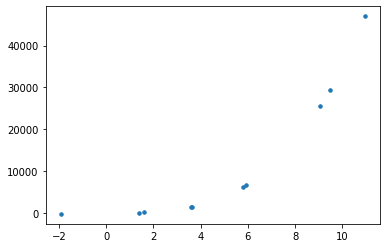

In [0]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 + 4 * np.random.normal(0, 1, 10)
y = x - 10 * (x ** 2) + 30 * (x ** 3) + .6*(x** 4)+ np.random.normal(-3, 3, 10)

plt.scatter(x,y, s=12)
plt.show()

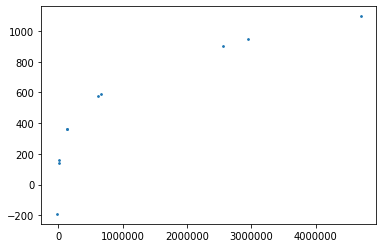

In [0]:
plt.scatter(100*y,100*x, s=3)
plt.show()

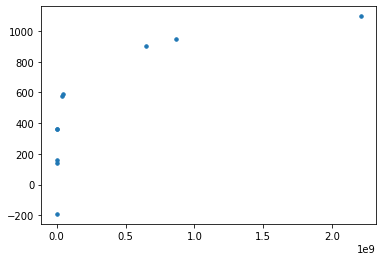

In [0]:
plt.scatter(y**2,x*100, s=12)
plt.show()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset = pd.read_csv("Position_Salaries.csv")

In [0]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


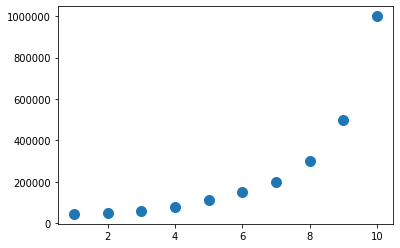

In [0]:
np.random.seed(5)
Level = 2 - 4 * np.random.normal(0, 1, 10)
Salary = x - .2 * (Level ** 2) + 0.8 * (Level ** 3) + np.random.normal(1, 3, 10)

plt.scatter(dataset.Level,dataset.Salary, s=100)
plt.show()

In [0]:
dataset.head

<bound method NDFrame.head of             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000>

Overfitting refers to a model that models the training data too well.
Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize

My rule-of-thumb is to select a form for the fit such that the number of data points is 5X to 10X the number of coefficients.  If you cannot afford the luxury, you can go lower never below 2X.  Simple example: If you have ten data points in a single variable, y=f(x), a 9th order polynomial will give you a perfect fit -- classic example of over-fitting.  Using my rule-of-thumb, you would try to fit a quadratic or a fourth-order curve.  The basic idea is that if the number of data points is ten times the number of parameters, overfitting is not possible.

The basic goal of regression analysis is to model the expected value of a dependent variable y in terms of the value of an independent variable x. In simple regression, we used following equation –

y = a + bx + e


In many cases, this linear model will not work out For example if we analyzing the production of chemical synthesis in terms of temperature at which the synthesis take place in such cases we use quadratic model

y = a + b1x + b2^2 + e


In general, we can model it for nth value.

The polymonial regression look like :

y = a + b1x + b2x^2 +....+ bnx^n



**Lets use in the test data .**

In [0]:
X = dataset.iloc[:, 1:2].values 
y = dataset.iloc[:, 2].values 


In [0]:
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 
  
lin.fit(X, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

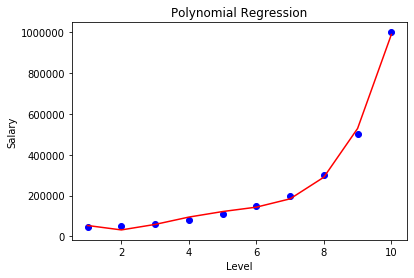

In [0]:
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Level') 
plt.ylabel('Salary') 
  
plt.show() 

In [0]:
import pandas as pd
import numpy as np
X = pd.DataFrame(np.c_[dataset['Level']], columns = ['Level'])
Y = dataset['Salary']

In [0]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8, 1)
(2, 1)
(8,)
(2,)


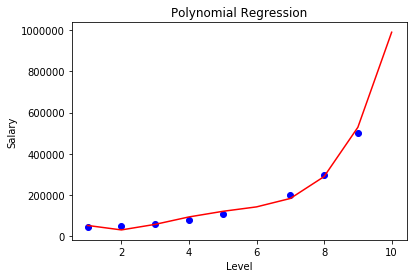

In [0]:
plt.scatter(X_train, Y_train, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Level') 
plt.ylabel('Salary') 
  
plt.show() 

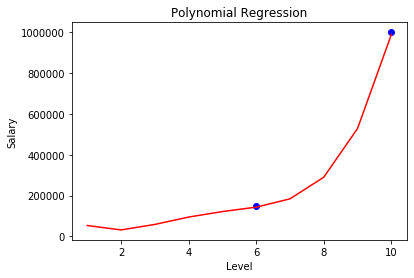

In [0]:
plt.scatter(X_test, Y_test, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Level') 
plt.ylabel('Salary') 
  
plt.show() 

In [0]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)


Y_pred=regressor.predict(X_test)



rss=((Y_test-Y_pred)**2).sum()
mse=np.mean((Y_test-Y_pred)**2)

print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 410745.51336510526
